In [ ]:
!pip install download

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SPREADSHEET_ID = '1nneEtQLC4E5PbbrUkH5CYbIFTYTWu2lAAkXVkzg9F4g'
csv_export_url = f'https://docs.google.com/spreadsheets/d/{SPREADSHEET_ID}/export?format=csv'
df = pd.read_csv(csv_export_url,encoding='ISO-8859-1')

In [ ]:
df = pd.read_csv(csv_export_url)


In [ ]:
df

TS  Wind speed (m/s)  \
0      2016-07-02 16:20:00              0.00   
1      2016-07-02 16:30:00             11.24   
2      2016-07-02 16:40:00             12.62   
3      2016-07-02 16:50:00             13.01   
4      2016-07-02 17:00:00             13.80   
...                    ...               ...   
26249  2016-12-31 23:10:00              5.59   
26250  2016-12-31 23:20:00              6.08   
26251  2016-12-31 23:30:00              8.35   
26252  2016-12-31 23:40:00              9.18   
26253  2016-12-31 23:50:00              7.65   

       Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
0                                      0.00                       0.00   
1                                      1.54                       6.23   
2                                      2.05                       8.40   
3                                      1.92                       8.36   
4                                      1.37                       9.68   
...                                     ...                        ...   
26249                                  0.44                       4.21   
26250                                  0.73                       4.20   
26251                                  0.90                       4.86   
26252                                  0.67                       7.35   
26253                                  0.73                       5.56   

       Wind speed, Maximum (m/s)  Long Term Wind (m/s)  \
0                       0.000000                   5.6   
1                      14.910000                   5.6   
2                      16.820000                   5.6   
3                      18.180000                   5.6   
4                      17.440001                   5.6   
...                          ...                   ...   
26249                   6.950000                   8.3   
26250                   8.830000                   8.3   
26251                  10.730000                   8.3   
26252                  11.250000                   8.3   
26253                   9.550000                   8.3   

       Wind speed Sensor 1 (m/s)  \
0                           0.00   
1                          11.41   
2                          12.82   
3                          13.25   
4                          13.93   
...                          ...   
26249                       5.64   
26250                       6.16   
26251                       8.49   
26252                       9.22   
26253                       7.65   

       Wind speed Sensor 1, Standard deviation (m/s)  \
0                                               0.00   
1                                               1.60   
2                                               2.13   
3                                               1.93   
4                                               1.41   
...                                              ...   
26249                                           0.43   
26250                                           0.74   
26251                                           0.90   
26252                                           0.71   
26253                                           0.74   

       Wind speed Sensor 1, Minimum (m/s)  Wind speed Sensor 1, Maximum (m/s)  \
0                                    0.00                            0.000000   
1                                    6.24                           15.230000   
2                                    8.41                           17.190001   
3                                    8.76                           18.260000   
4                                    9.92                           17.740000   
...                                   ...                                 ...   
26249                                4.61                            6.840000   
26250                                4.17                            8.850000   
26251                     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26254 entries, 0 to 26253
Columns: 300 entries, TS to Tower Acceleration Y, StdDev (mm/ss)
dtypes: float64(282), int64(17), object(1)
memory usage: 60.1+ MB


In [ ]:
print(df.columns.tolist())

['TS', 'Wind speed (m/s)', 'Wind speed, Standard deviation (m/s)', 'Wind speed, Minimum (m/s)', 'Wind speed, Maximum (m/s)', 'Long Term Wind (m/s)', 'Wind speed Sensor 1 (m/s)', 'Wind speed Sensor 1, Standard deviation (m/s)', 'Wind speed Sensor 1, Minimum (m/s)', 'Wind speed Sensor 1, Maximum (m/s)', 'Wind speed Sensor 2 (m/s)', 'Wind speed Sensor 2, Standard deviation (m/s)', 'Wind speed Sensor 2, Minimum (m/s)', 'Wind speed Sensor 2, Maximum (m/s)', 'Density adjusted wind speed (m/s)', 'Wind direction (°)', 'Nacelle position (°)', 'Wind direction, Standard deviation (°)', 'Wind direction, Minimum (°)', 'Wind direction, Maximum (°)', 'Nacelle position, Standard deviation (°)', 'Nacelle position, Minimum (°)', 'Nacelle position, Maximum (°)', 'Vane position 1+2 (°)', 'Vane position 1+2, Max (°)', 'Vane position 1+2, Min (°)', 'Vane position 1+2, StdDev (°)', 'Energy Export (kWh)', 'Energy Export counter (kWh)', 'Energy Import (kWh)', 'Energy Import counter (kWh)', 'Lost Production (Co

In [ ]:
df['TS'] = pd.to_datetime(df['TS'], errors='coerce')

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  26254
Columns  :  300

Features : 
 ['TS', 'Wind speed (m/s)', 'Wind speed, Standard deviation (m/s)', 'Wind speed, Minimum (m/s)', 'Wind speed, Maximum (m/s)', 'Long Term Wind (m/s)', 'Wind speed Sensor 1 (m/s)', 'Wind speed Sensor 1, Standard deviation (m/s)', 'Wind speed Sensor 1, Minimum (m/s)', 'Wind speed Sensor 1, Maximum (m/s)', 'Wind speed Sensor 2 (m/s)', 'Wind speed Sensor 2, Standard deviation (m/s)', 'Wind speed Sensor 2, Minimum (m/s)', 'Wind speed Sensor 2, Maximum (m/s)', 'Density adjusted wind speed (m/s)', 'Wind direction (°)', 'Nacelle position (°)', 'Wind direction, Standard deviation (°)', 'Wind direction, Minimum (°)', 'Wind direction, Maximum (°)', 'Nacelle position, Standard deviation (°)', 'Nacelle position, Minimum (°)', 'Nacelle position, Maximum (°)', 'Vane position 1+2 (°)', 'Vane position 1+2, Max (°)', 'Vane position 1+2, Min (°)', 'Vane position 1+2, StdDev (°)', 'Energy Export (kWh)', 'Energy Export counter (kWh)', 'Energy Import (kWh)', 'En

In [ ]:
df.describe()

TS  Wind speed (m/s)  \
count                26254      19354.000000   
mean   2016-10-01 20:05:00          7.353948   
min    2016-07-02 16:20:00          0.000000   
25%    2016-08-17 06:12:30          4.680000   
50%    2016-10-01 20:05:00          6.620000   
75%    2016-11-16 09:57:30          9.140000   
max    2016-12-31 23:50:00         25.809999   
std                    NaN          3.946901   

       Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
count                          19354.000000               19354.000000   
mean                               0.913030                   4.922475   
min                                0.000000                  -0.010000   
25%                                0.520000                   3.140000   
50%                                0.770000                   4.510000   
75%                                1.140000                   6.250000   
max                                5.510000                  18.750000   
std                                0.579331                   2.732553   

       Wind speed, Maximum (m/s)  Long Term Wind (m/s)  \
count               19354.000000          26254.000000   
mean                   10.061676              7.075432   
min                     0.000000              5.600000   
25%                     6.300000              6.000000   
50%                     8.950000              7.500000   
75%                    12.530000              8.100000   
max                    34.709999              8.300000   
std                     5.462610              1.005078   

       Wind speed Sensor 1 (m/s)  \
count               19302.000000   
mean                    7.367559   
min                     0.000000   
25%                     4.790000   
50%                     6.700000   
75%                     9.180000   
max                    24.709999   
std                     3.813608   

       Wind speed Sensor 1, Standard deviation (m/s)  \
count                                   19302.000000   
mean                                        0.855546   
min                                         0.000000   
25%                                         0.500000   
50%                                         0.740000   
75%                                         1.090000   
max                                         4.720000   
std                                         0.506747   

       Wind speed Sensor 1, Minimum (m/s)  Wind speed Sensor 1, Maximum (m/s)  \
count                        19124.000000                        19302.000000   
mean                             5.216163                            9.896365   
min                              0.000000                            0.000000   
25%                              3.480000                            6.300000   
50%                              4.820000                            8.960000   
75%                              6.490000                           12.430000   
max                             18.660000                           32.580002   
std                              2.725250                            5.123627   

       ...  Tower Acceleration y (mm/ss)  Tower Acceleration X, Min (mm/ss)  \
count  ...                           0.0                                0.0   
mean   ...                           NaN                                NaN   
min    ...                           NaN                                NaN   
25%    ...                           NaN                                NaN   
50%    ...                           NaN                                NaN   
75%    ...                           NaN                                NaN   
max    ...                           NaN                                NaN   
std    ...                           NaN                                NaN   

       Tower Acceleration X, Max (mm/ss)  Tower Acceleration Y, Min (mm/ss)  \
count                                0.0          

In [ ]:
aq_df_non_indexed=df.copy()
print(df.columns.tolist())

['TS', 'Wind speed (m/s)', 'Wind speed, Standard deviation (m/s)', 'Wind speed, Minimum (m/s)', 'Wind speed, Maximum (m/s)', 'Long Term Wind (m/s)', 'Wind speed Sensor 1 (m/s)', 'Wind speed Sensor 1, Standard deviation (m/s)', 'Wind speed Sensor 1, Minimum (m/s)', 'Wind speed Sensor 1, Maximum (m/s)', 'Wind speed Sensor 2 (m/s)', 'Wind speed Sensor 2, Standard deviation (m/s)', 'Wind speed Sensor 2, Minimum (m/s)', 'Wind speed Sensor 2, Maximum (m/s)', 'Density adjusted wind speed (m/s)', 'Wind direction (°)', 'Nacelle position (°)', 'Wind direction, Standard deviation (°)', 'Wind direction, Minimum (°)', 'Wind direction, Maximum (°)', 'Nacelle position, Standard deviation (°)', 'Nacelle position, Minimum (°)', 'Nacelle position, Maximum (°)', 'Vane position 1+2 (°)', 'Vane position 1+2, Max (°)', 'Vane position 1+2, Min (°)', 'Vane position 1+2, StdDev (°)', 'Energy Export (kWh)', 'Energy Export counter (kWh)', 'Energy Import (kWh)', 'Energy Import counter (kWh)', 'Lost Production (Co

In [ ]:
df = df.set_index('TS')

In [ ]:
df.index

DatetimeIndex(['2016-07-02 16:20:00', '2016-07-02 16:30:00',
               '2016-07-02 16:40:00', '2016-07-02 16:50:00',
               '2016-07-02 17:00:00', '2016-07-02 17:10:00',
               '2016-07-02 17:20:00', '2016-07-02 17:30:00',
               '2016-07-02 17:40:00', '2016-07-02 17:50:00',
               ...
               '2016-12-31 22:20:00', '2016-12-31 22:30:00',
               '2016-12-31 22:40:00', '2016-12-31 22:50:00',
               '2016-12-31 23:00:00', '2016-12-31 23:10:00',
               '2016-12-31 23:20:00', '2016-12-31 23:30:00',
               '2016-12-31 23:40:00', '2016-12-31 23:50:00'],
              dtype='datetime64[ns]', name='TS', length=26254, freq=None)

In [ ]:
df.head()

Wind speed (m/s)  Wind speed, Standard deviation (m/s)  \
TS                                                                            
2016-07-02 16:20:00              0.00                                  0.00   
2016-07-02 16:30:00             11.24                                  1.54   
2016-07-02 16:40:00             12.62                                  2.05   
2016-07-02 16:50:00             13.01                                  1.92   
2016-07-02 17:00:00             13.80                                  1.37   

                     Wind speed, Minimum (m/s)  Wind speed, Maximum (m/s)  \
TS                                                                          
2016-07-02 16:20:00                       0.00                   0.000000   
2016-07-02 16:30:00                       6.23                  14.910000   
2016-07-02 16:40:00                       8.40                  16.820000   
2016-07-02 16:50:00                       8.36                  18.180000   
2016-07-02 17:00:00                       9.68                  17.440001   

                     Long Term Wind (m/s)  Wind speed Sensor 1 (m/s)  \
TS                                                                     
2016-07-02 16:20:00                   5.6                       0.00   
2016-07-02 16:30:00                   5.6                      11.41   
2016-07-02 16:40:00                   5.6                      12.82   
2016-07-02 16:50:00                   5.6                      13.25   
2016-07-02 17:00:00                   5.6                      13.93   

                     Wind speed Sensor 1, Standard deviation (m/s)  \
TS                                                                   
2016-07-02 16:20:00                                           0.00   
2016-07-02 16:30:00                                           1.60   
2016-07-02 16:40:00                                           2.13   
2016-07-02 16:50:00                                           1.93   
2016-07-02 17:00:00                                           1.41   

                     Wind speed Sensor 1, Minimum (m/s)  \
TS                                                        
2016-07-02 16:20:00                                0.00   
2016-07-02 16:30:00                                6.24   
2016-07-02 16:40:00                                8.41   
2016-07-02 16:50:00                                8.76   
2016-07-02 17:00:00                                9.92   

                     Wind speed Sensor 1, Maximum (m/s)  \
TS                                                        
2016-07-02 16:20:00                            0.000000   
2016-07-02 16:30:00                           15.230000   
2016-07-02 16:40:00                           17.190001   
2016-07-02 16:50:00                           18.260000   
2016-07-02 17:00:00                           17.740000   

                     Wind speed Sensor 2 (m/s)  ...  \
TS                                              ...   
2016-07-02 16:20:00                       0.00  ...   
2016-07-02 16:30:00                      11.06  ...   
2016-07-02 16:40:00                      12.42  ...   
2016-07-02 16:50:00                      12.78  ...   
2016-07-02 17:00:00                      13.67  ...   

                     Tower Acceleration y (mm/ss)  \
TS                                                  
2016-07-02 16:20:00                           NaN   
2016-07-02 16:30:00                           NaN   
2016-07-02 16:40:00                           NaN   
2016-07-02 16:50:00                           NaN   
2016-07-02 17:00:00                           NaN   

                     Tower Acceleration X, Min (mm/ss)  \
TS                                                       
2016-07-02 16:20:00                                NaN   
2016-07-02 16:30:00                                NaN   
2016-07-02 16:40:00                                NaN   
2016-07-02 16:50:00                                NaN 

In [ ]:
df.loc['2016-07-02 16:20:00':'2016-12-02 16:20:00']

Wind speed (m/s)  Wind speed, Standard deviation (m/s)  \
TS                                                                            
2016-07-02 16:20:00              0.00                                  0.00   
2016-07-02 16:30:00             11.24                                  1.54   
2016-07-02 16:40:00             12.62                                  2.05   
2016-07-02 16:50:00             13.01                                  1.92   
2016-07-02 17:00:00             13.80                                  1.37   
...                               ...                                   ...   
2016-12-02 15:40:00              0.66                                  0.28   
2016-12-02 15:50:00              0.55                                  0.52   
2016-12-02 16:00:00              0.28                                  0.04   
2016-12-02 16:10:00              0.27                                  0.07   
2016-12-02 16:20:00              0.37                                  0.04   

                     Wind speed, Minimum (m/s)  Wind speed, Maximum (m/s)  \
TS                                                                          
2016-07-02 16:20:00                       0.00                   0.000000   
2016-07-02 16:30:00                       6.23                  14.910000   
2016-07-02 16:40:00                       8.40                  16.820000   
2016-07-02 16:50:00                       8.36                  18.180000   
2016-07-02 17:00:00                       9.68                  17.440001   
...                                        ...                        ...   
2016-12-02 15:40:00                       0.37                   1.650000   
2016-12-02 15:50:00                       0.01                   1.680000   
2016-12-02 16:00:00                       0.10                   0.410000   
2016-12-02 16:10:00                       0.13                   0.400000   
2016-12-02 16:20:00                       0.28                   0.450000   

                     Long Term Wind (m/s)  Wind speed Sensor 1 (m/s)  \
TS                                                                     
2016-07-02 16:20:00                   5.6                       0.00   
2016-07-02 16:30:00                   5.6                      11.41   
2016-07-02 16:40:00                   5.6                      12.82   
2016-07-02 16:50:00                   5.6                      13.25   
2016-07-02 17:00:00                   5.6                      13.93   
...                                   ...                        ...   
2016-12-02 15:40:00                   8.3                       0.15   
2016-12-02 15:50:00                   8.3                       0.36   
2016-12-02 16:00:00                   8.3                       0.00   
2016-12-02 16:10:00                   8.3                       0.00   
2016-12-02 16:20:00                   8.3                       0.00   

                     Wind speed Sensor 1, Standard deviation (m/s)  \
TS                                                                   
2016-07-02 16:20:00                                           0.00   
2016-07-02 16:30:00                                           1.60   
2016-07-02 16:40:00                                           2.13   
2016-07-02 16:50:00                                           1.93   
2016-07-02 17:00:00                                           1.41   
...                                                            ...   
2016-12-02 15:40:00                                           0.44   
2016-12-02 15:50:00                                           0.60   
2016-12-02 16:00:00                                           0.00   
2016-12-02 16:10:00                                           0.00   
2016-12-02 16:20:00                                           0.00   

                     Wind speed Sensor 1, Minimum (m/s)  \
TS                                                        
2016-07-02 16:20:00      

In [ ]:
pm_data = df['Wind speed (m/s)']
pm_data.head()

TS
2016-07-02 16:20:00     0.00
2016-07-02 16:30:00    11.24
2016-07-02 16:40:00    12.62
2016-07-02 16:50:00    13.01
2016-07-02 17:00:00    13.80
Name: Wind speed (m/s), dtype: float64

<Axes: xlabel='TS'>

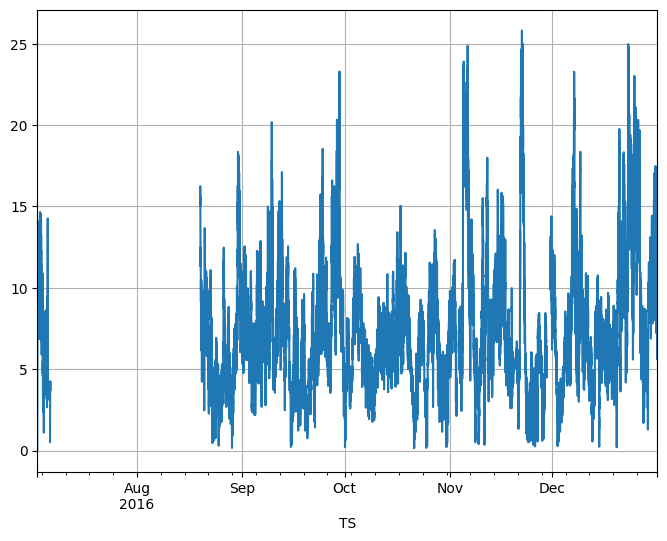

In [ ]:
pm_data.plot(grid=True)

In [ ]:
df.index


DatetimeIndex(['2016-07-02 16:20:00', '2016-07-02 16:30:00',
               '2016-07-02 16:40:00', '2016-07-02 16:50:00',
               '2016-07-02 17:00:00', '2016-07-02 17:10:00',
               '2016-07-02 17:20:00', '2016-07-02 17:30:00',
               '2016-07-02 17:40:00', '2016-07-02 17:50:00',
               ...
               '2016-12-31 22:20:00', '2016-12-31 22:30:00',
               '2016-12-31 22:40:00', '2016-12-31 22:50:00',
               '2016-12-31 23:00:00', '2016-12-31 23:10:00',
               '2016-12-31 23:20:00', '2016-12-31 23:30:00',
               '2016-12-31 23:40:00', '2016-12-31 23:50:00'],
              dtype='datetime64[ns]', name='TS', length=26254, freq=None)

<Axes: xlabel='TS'>

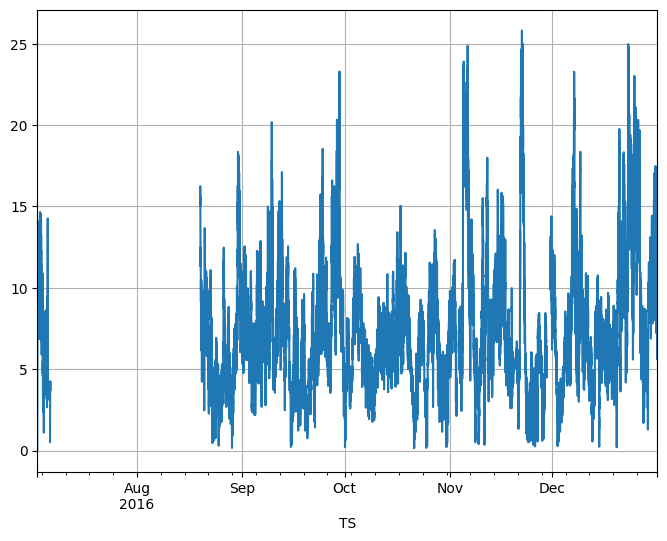

In [ ]:
aq_df_2018=df.loc['2016']
pm_data_2018=aq_df_2018['Wind speed (m/s)']
pm_data_2018.plot(grid=True)

In [ ]:
df.index = pd.to_datetime(df.index)

<Axes: xlabel='TS'>

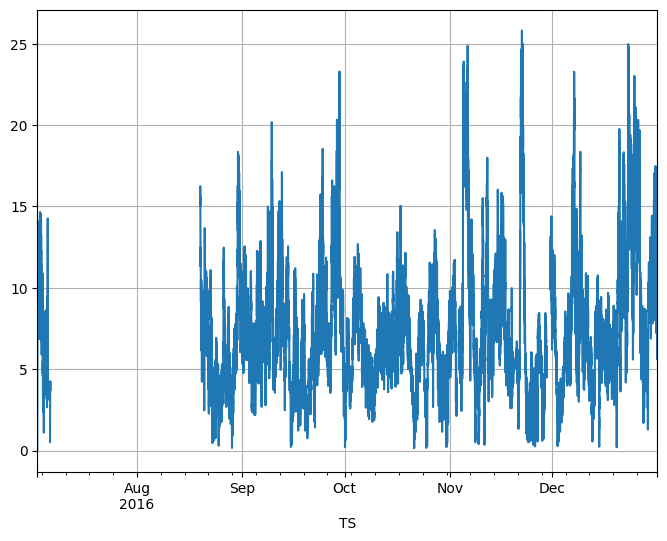

In [ ]:

aq_df_2016 = df.loc['2016']

pm_data_2016 = aq_df_2016['Wind speed (m/s)']
pm_data_2016.plot(grid=True)

In [ ]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='TS', y='Wind speed (m/s)', title='Wind speed with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.line(aq_df_non_indexed, x='TS',y='Drive train acceleration, Min (mm/ss)', title='Drive train acceleration, Min (mm/ss) with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

array([<Axes: xlabel='TS'>, <Axes: xlabel='TS'>], dtype=object)

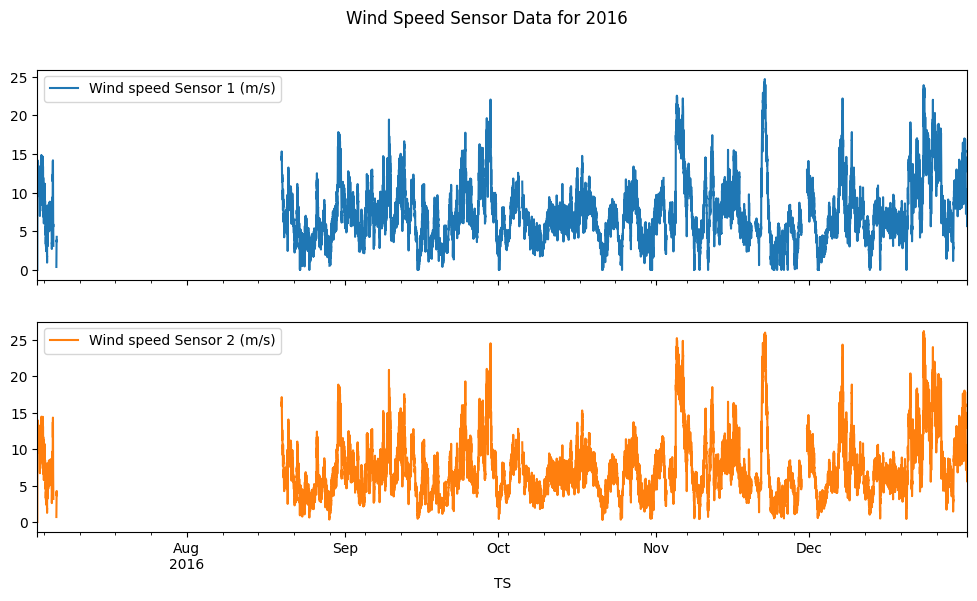

In [ ]:
# Assuming 'df' has the 'TS' column set as its datetime index

# 1. Clean Column Names Again (Just in case the previous fix wasn't permanent or missed some)
df.columns = df.columns.str.strip()

# 2. Re-create the 2016 slice
aq_df_2016 = df.loc['2016']

# 3. Select the correct column names (assuming you only need one closing parenthesis)
# I am also stripping any spaces in the names shown in the original data to be safe:
pm_data_2016 = aq_df_2016[[
    'Wind speed Sensor 1 (m/s)',
    'Wind speed Sensor 2 (m/s)'
]]

# 4. Plot the data
pm_data_2016.plot(
    subplots=True,
    figsize=(12, 6), # Make the plots a bit bigger
    title='Wind Speed Sensor Data for 2016'
)

In [ ]:
df.isnull().values.any()

np.True_

In [ ]:
df.isnull().any()

Wind speed (m/s)                             True
Wind speed, Standard deviation (m/s)         True
Wind speed, Minimum (m/s)                    True
Wind speed, Maximum (m/s)                    True
Long Term Wind (m/s)                        False
                                            ...  
Drive train acceleration, Max (mm/ss)        True
Drive train acceleration, Min (mm/ss)        True
Drive train acceleration, StdDev (mm/ss)     True
Tower Acceleration X, StdDev (mm/ss)         True
Tower Acceleration Y, StdDev (mm/ss)         True
Length: 299, dtype: bool

In [ ]:
df.isnull().sum()

Wind speed (m/s)                             6900
Wind speed, Standard deviation (m/s)         6900
Wind speed, Minimum (m/s)                    6900
Wind speed, Maximum (m/s)                    6900
Long Term Wind (m/s)                            0
                                            ...  
Drive train acceleration, Max (mm/ss)        6900
Drive train acceleration, Min (mm/ss)        6900
Drive train acceleration, StdDev (mm/ss)     6900
Tower Acceleration X, StdDev (mm/ss)        26254
Tower Acceleration Y, StdDev (mm/ss)        26254
Length: 299, dtype: int64

In [ ]:
# List of the features to check for missing data
features_to_check = [
    'Wind speed Sensor 1 (m/s)',
    'Wind speed Sensor 2 (m/s)',
    'Stator temperature 1 (°C)',
    'Power (kW)',
    'Rotor speed (RPM)',
    'Gear oil temperature (°C)',
    'Wind direction (°)',
    'Energy Export (kWh)',
    'Voltage L1 / U (V)'
]

# Code to select rows where ANY of the features in the list is null
df[df[features_to_check].isnull().any(axis=1)]

Wind speed (m/s)  Wind speed, Standard deviation (m/s)  \
TS                                                                            
2016-07-02 16:20:00              0.00                                  0.00   
2016-07-02 16:30:00             11.24                                  1.54   
2016-07-02 16:40:00             12.62                                  2.05   
2016-07-02 16:50:00             13.01                                  1.92   
2016-07-02 17:00:00             13.80                                  1.37   
...                               ...                                   ...   
2016-12-31 23:10:00              5.59                                  0.44   
2016-12-31 23:20:00              6.08                                  0.73   
2016-12-31 23:30:00              8.35                                  0.90   
2016-12-31 23:40:00              9.18                                  0.67   
2016-12-31 23:50:00              7.65                                  0.73   

                     Wind speed, Minimum (m/s)  Wind speed, Maximum (m/s)  \
TS                                                                          
2016-07-02 16:20:00                       0.00                   0.000000   
2016-07-02 16:30:00                       6.23                  14.910000   
2016-07-02 16:40:00                       8.40                  16.820000   
2016-07-02 16:50:00                       8.36                  18.180000   
2016-07-02 17:00:00                       9.68                  17.440001   
...                                        ...                        ...   
2016-12-31 23:10:00                       4.21                   6.950000   
2016-12-31 23:20:00                       4.20                   8.830000   
2016-12-31 23:30:00                       4.86                  10.730000   
2016-12-31 23:40:00                       7.35                  11.250000   
2016-12-31 23:50:00                       5.56                   9.550000   

                     Long Term Wind (m/s)  Wind speed Sensor 1 (m/s)  \
TS                                                                     
2016-07-02 16:20:00                   5.6                       0.00   
2016-07-02 16:30:00                   5.6                      11.41   
2016-07-02 16:40:00                   5.6                      12.82   
2016-07-02 16:50:00                   5.6                      13.25   
2016-07-02 17:00:00                   5.6                      13.93   
...                                   ...                        ...   
2016-12-31 23:10:00                   8.3                       5.64   
2016-12-31 23:20:00                   8.3                       6.16   
2016-12-31 23:30:00                   8.3                       8.49   
2016-12-31 23:40:00                   8.3                       9.22   
2016-12-31 23:50:00                   8.3                       7.65   

                     Wind speed Sensor 1, Standard deviation (m/s)  \
TS                                                                   
2016-07-02 16:20:00                                           0.00   
2016-07-02 16:30:00                                           1.60   
2016-07-02 16:40:00                                           2.13   
2016-07-02 16:50:00                                           1.93   
2016-07-02 17:00:00                                           1.41   
...                                                            ...   
2016-12-31 23:10:00                                           0.43   
2016-12-31 23:20:00                                           0.74   
2016-12-31 23:30:00                                           0.90   
2016-12-31 23:40:00                                           0.71   
2016-12-31 23:50:00                                           0.74   

                     Wind speed Sensor 1, Minimum (m/s)  \
TS                                                        
2016-07-02 16:20:00      

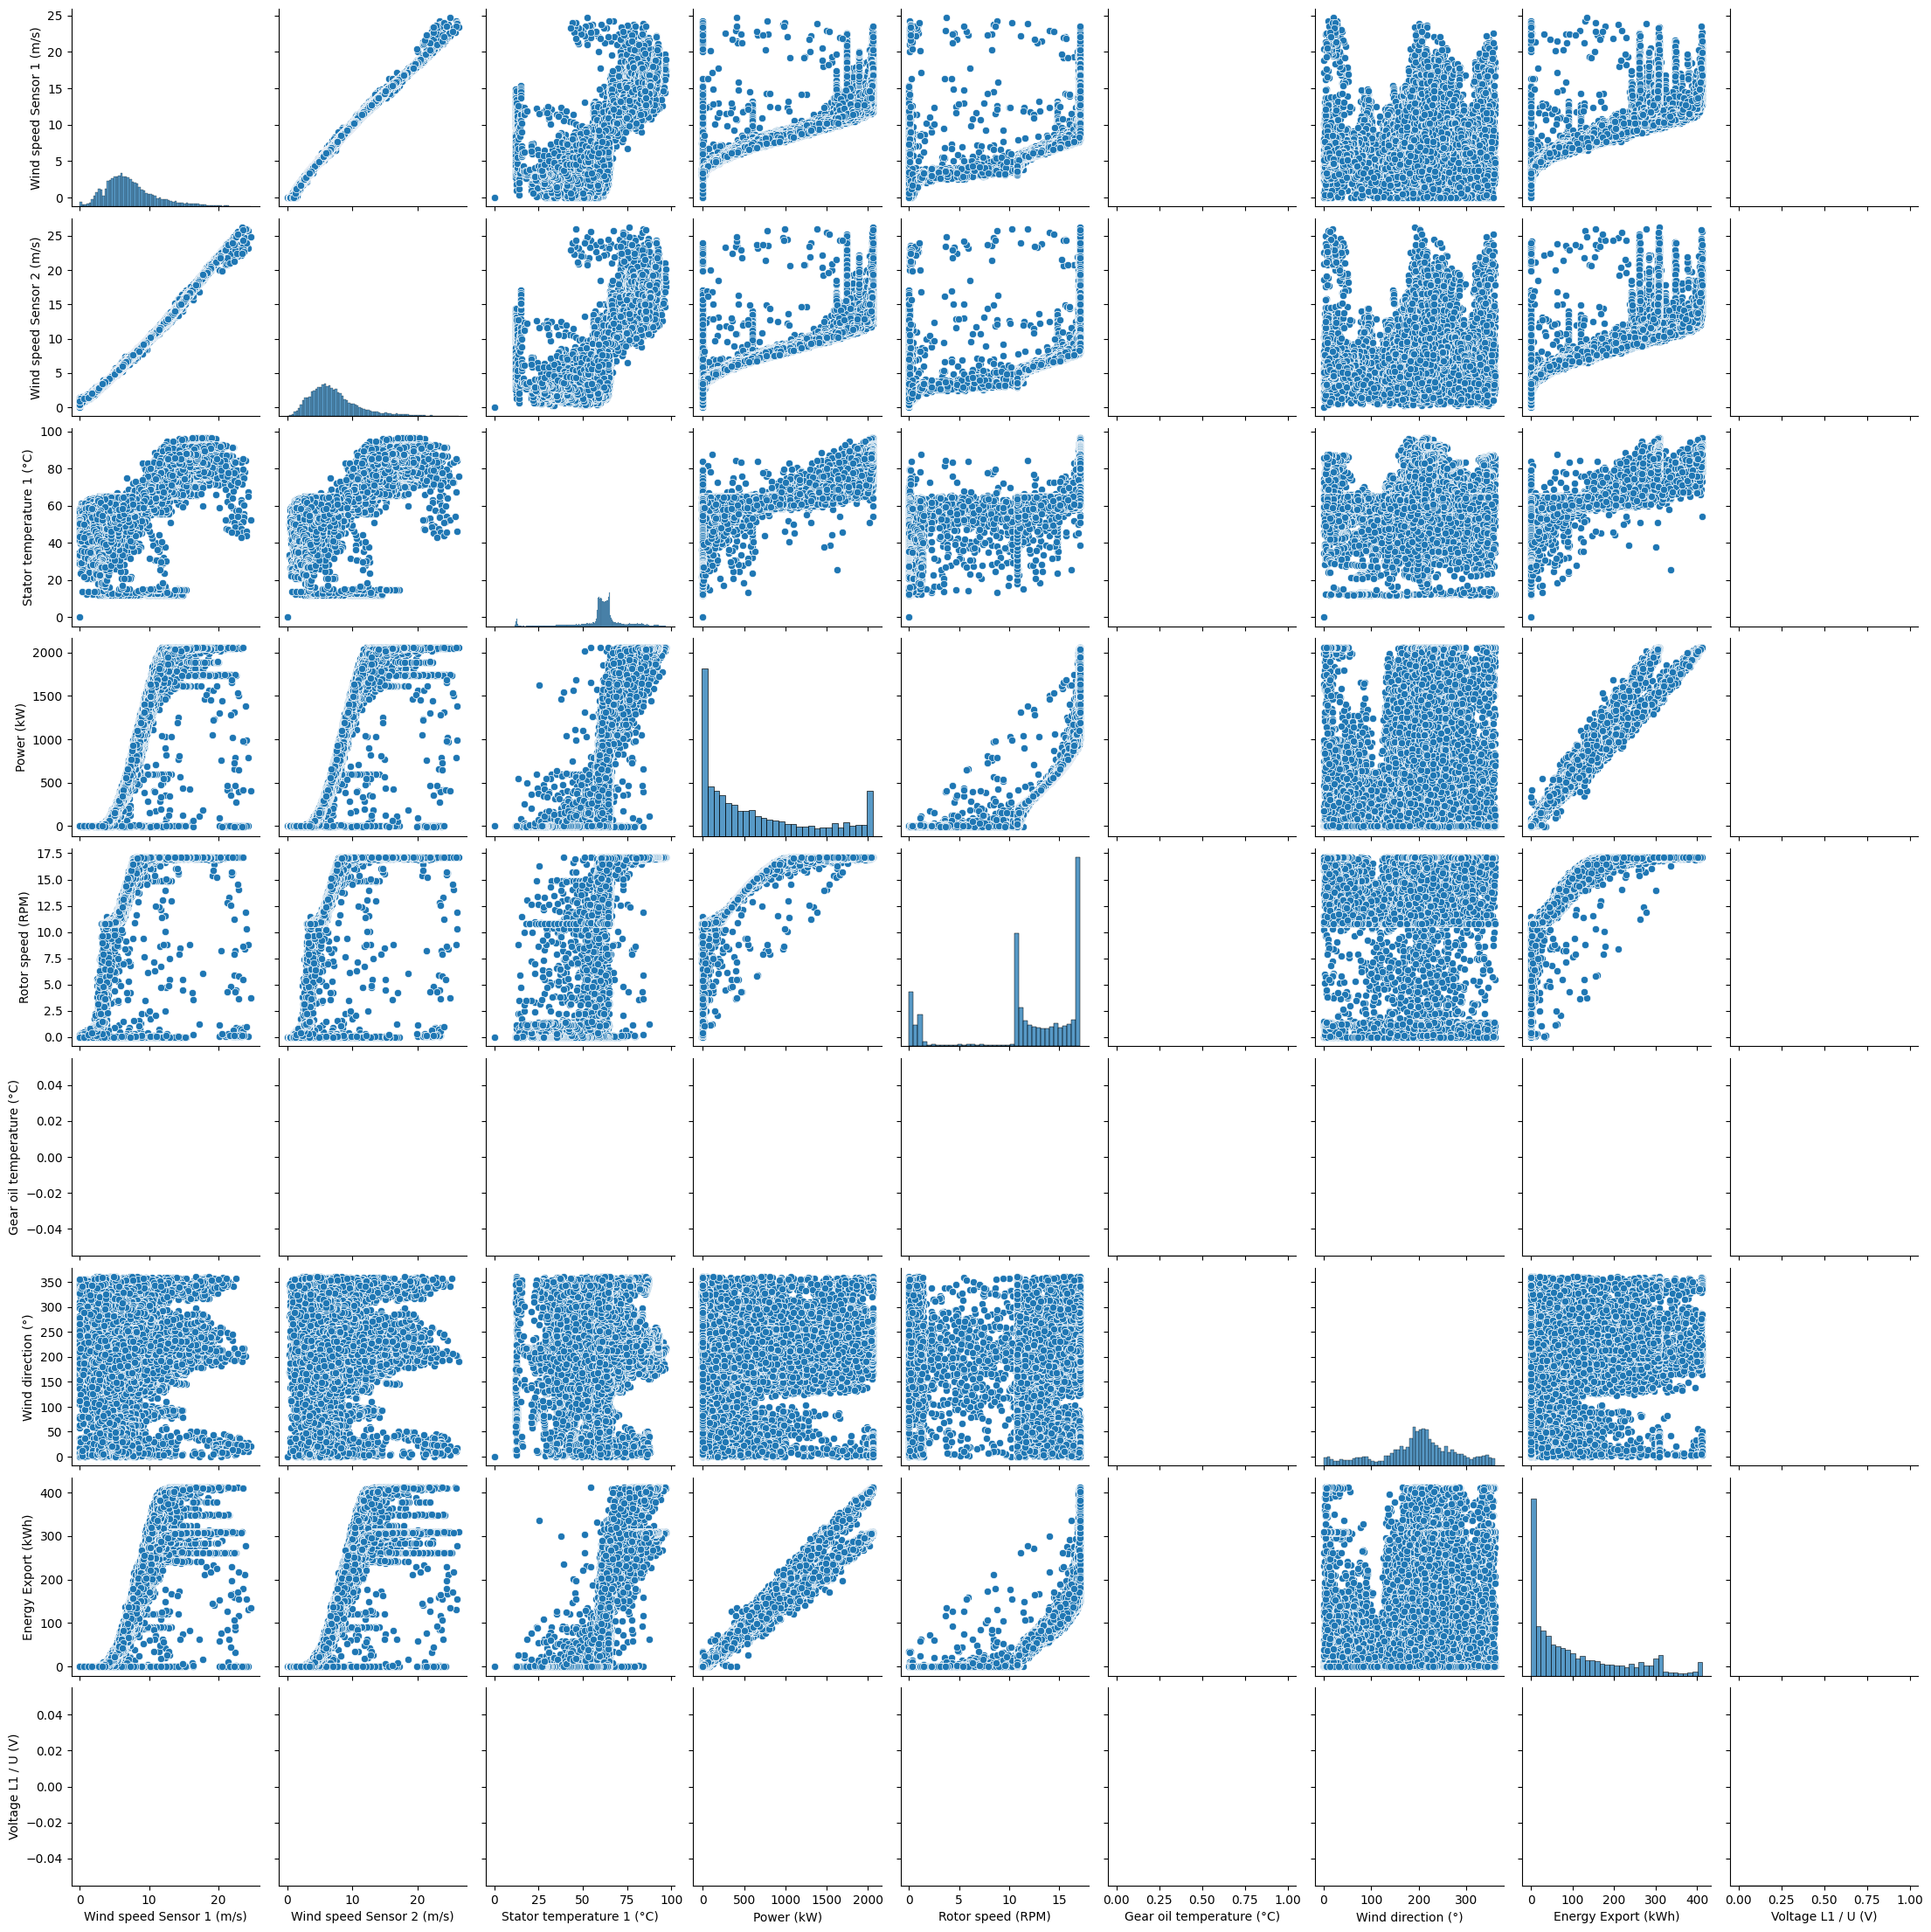

In [ ]:
g = sns.pairplot(df[[
    'Wind speed Sensor 1 (m/s)',
    'Wind speed Sensor 2 (m/s)',
    'Stator temperature 1 (°C)',
    'Power (kW)',
    'Rotor speed (RPM)',
    'Gear oil temperature (°C)',
    'Wind direction (°)',
    'Energy Export (kWh)',
    'Voltage L1 / U (V)'
]])

In [ ]:
aq_corr=df[[
    'Wind speed Sensor 1 (m/s)',
    'Wind speed Sensor 2 (m/s)',
    'Stator temperature 1 (°C)',
    'Power (kW)',
    'Rotor speed (RPM)',
    'Gear oil temperature (°C)',
    'Wind direction (°)',
    'Energy Export (kWh)',
    'Voltage L1 / U (V)'
]].corr(method='pearson')
aq_corr

Wind speed Sensor 1 (m/s)  \
Wind speed Sensor 1 (m/s)                   1.000000   
Wind speed Sensor 2 (m/s)                   0.997202   
Stator temperature 1 (°C)                   0.576862   
Power (kW)                                  0.867178   
Rotor speed (RPM)                           0.635978   
Gear oil temperature (°C)                        NaN   
Wind direction (°)                          0.093412   
Energy Export (kWh)                         0.850171   
Voltage L1 / U (V)                               NaN   

                           Wind speed Sensor 2 (m/s)  \
Wind speed Sensor 1 (m/s)                   0.997202   
Wind speed Sensor 2 (m/s)                   1.000000   
Stator temperature 1 (°C)                   0.577112   
Power (kW)                                  0.866647   
Rotor speed (RPM)                           0.618823   
Gear oil temperature (°C)                        NaN   
Wind direction (°)                          0.095880   
Energy Export (kWh)                         0.849630   
Voltage L1 / U (V)                               NaN   

                           Stator temperature 1 (°C)  Power (kW)  \
Wind speed Sensor 1 (m/s)                   0.576862    0.867178   
Wind speed Sensor 2 (m/s)                   0.577112    0.866647   
Stator temperature 1 (°C)                   1.000000    0.687335   
Power (kW)                                  0.687335    1.000000   
Rotor speed (RPM)                           0.726384    0.741313   
Gear oil temperature (°C)                        NaN         NaN   
Wind direction (°)                          0.124460    0.147472   
Energy Export (kWh)                         0.676441    0.979856   
Voltage L1 / U (V)                               NaN         NaN   

                           Rotor speed (RPM)  Gear oil temperature (°C)  \
Wind speed Sensor 1 (m/s)           0.635978                        NaN   
Wind speed Sensor 2 (m/s)           0.618823                        NaN   
Stator temperature 1 (°C)           0.726384                        NaN   
Power (kW)                          0.741313                        NaN   
Rotor speed (RPM)                   1.000000                        NaN   
Gear oil temperature (°C)                NaN                        NaN   
Wind direction (°)                  0.126759                        NaN   
Energy Export (kWh)                 0.726625                        NaN   
Voltage L1 / U (V)                       NaN                        NaN   

                           Wind direction (°)  Energy Export (kWh)  \
Wind speed Sensor 1 (m/s)            0.093412             0.850171   
Wind speed Sensor 2 (m/s)            0.095880             0.849630   
Stator temperature 1 (°C)            0.124460             0.676441   
Power (kW)                           0.147472             0.979856   
Rotor speed (RPM)                    0.126759             0.726625   
Gear oil temperature (°C)                 NaN                  NaN   
Wind direction (°)                   1.000000             0.144888   
Energy Export (kWh)                  0.144888             1.000000   
Voltage L1 / U (V)                        NaN                  NaN   

                           Voltage L1 / U (V)  
Wind speed Sensor 1 (m/s)                 NaN  
Wind speed Sensor 2 (m/s)                 NaN  
Stator temperature 1 (°C)                 NaN  
Power (kW)                                NaN  
Rotor speed (RPM)                         NaN  
Gear oil temperature (°C)                 NaN  
Wind direction (°)                        NaN  
Energy Export (kWh)                       NaN  
Voltage L1 / U (V)                        NaN

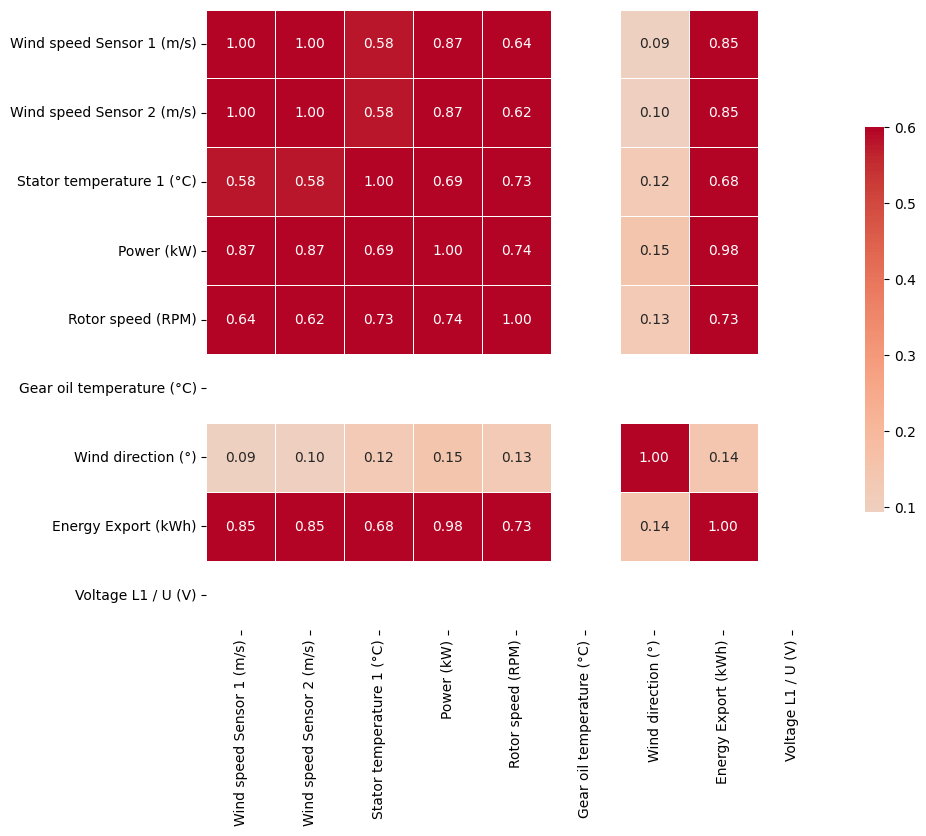

In [ ]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)

plt.show()